In [6]:
import numpy, pandas, matplotlib.pyplot as plt

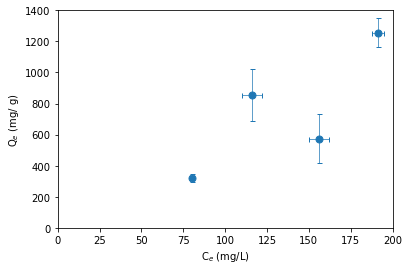

<Figure size 432x288 with 0 Axes>

In [36]:
df = pandas.read_excel('data/replication_raw.xlsx')
df['C0'] = df['C0_AA']*df['df']
df['Cf'] = df['Cf_AA']*df['df']
df['m'] = 0.0363 #g/L
df['Q'] = (df['C0'] - df['Cf'])/df['m']
df_grp = df.groupby('C0_nominal')[['Cf', 'Q']]
df_grp_means = df_grp.mean()
df_grp_stdvs = df_grp.std()

x = df_grp_means['Cf']
xerr = df_grp_stdvs['Cf']/numpy.sqrt(3)
y = df_grp_means['Q']
yerr = df_grp_stdvs['Q']/numpy.sqrt(3)

fig = plt.figure()
plt.errorbar(x=x,
             y=y,
             xerr=xerr,
             yerr=yerr,
             fmt='o',
             capsize=2.5,  
             elinewidth=0.7, 
             markersize=7, 
             linewidth=4)

plt.xlim(0, 200)
plt.ylim(0, 1400)
plt.xlabel('C$_e$ (mg/L)')
plt.ylabel('Q$_e$ (mg/ g)')
plt.show()
plt.draw()

fig.savefig('pics/b_culture_replication.pdf')

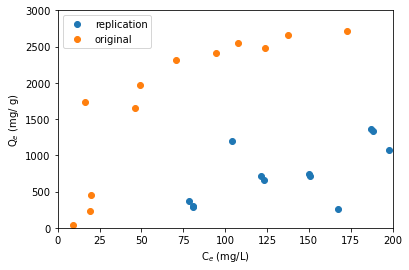

<Figure size 432x288 with 0 Axes>

In [48]:
fig2 = plt.figure()
plt.plot(df['Cf'], df['Q'], 'o', label='replication')
df_old = pandas.read_excel('data/Initialisaion_raw.xlsx')
plt.plot(df_old['C_f'], df_old['Q'], 'o', label='original')

plt.xlim(0, 200)
plt.ylim(0, 3000)
plt.xlabel('C$_e$ (mg/L)')
plt.ylabel('Q$_e$ (mg/ g)')
plt.legend()
plt.show()
plt.draw()

plt.show()
fig2.savefig('pics/b_culture_original_vs_rep.pdf')

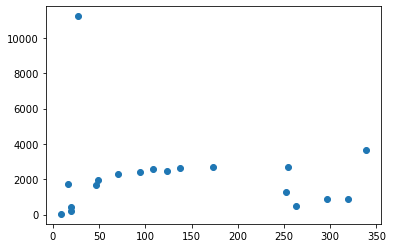